In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [229]:
df_trn = pd.read_csv('train.csv')
df_tst = pd.read_csv('test.csv')

In [230]:
df_trn.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Check for Imbalance

Percent of Class 0 :  61.61616161616162
Percent of Class 1 :  38.38383838383838


<AxesSubplot:>

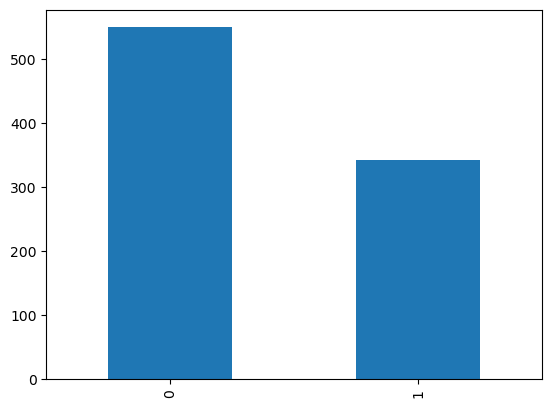

In [231]:
print('Percent of Class 0 : ',((len(df_trn[df_trn.Survived == 0]))*100)/(len(df_trn.Survived)))
print('Percent of Class 1 : ',((len(df_trn[df_trn.Survived == 1]))*100)/(len(df_trn.Survived)))
df_trn.Survived.value_counts().plot.bar()

# Train

In [232]:
df_trn.shape

(891, 12)

In [233]:
df_trn.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [234]:
df_trn.drop(['Cabin'], axis = 1, inplace = True)

In [235]:
df_trn = df_trn.drop_duplicates()

In [236]:
df_trn.shape

(891, 11)

In [237]:
df_trn.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [238]:
len(df_trn.PassengerId.unique())

891

In [239]:
df_trn.drop(['Name'], axis = 1, inplace = True)

In [240]:
df_trn.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [241]:
df_trn.Age.isnull().sum()

177

In [242]:
df_trn.Age.mean(), df_trn.Age.median()

(29.69911764705882, 28.0)

In [243]:
df_trn.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [244]:
df_trn.Age = df_trn.Age.fillna(df_trn['Age'].mean())

In [245]:
df_trn.drop(['Ticket'], axis = 1, inplace = True)

In [246]:
df_trn.Embarked = df_trn.Embarked.fillna( method ='ffill',limit=1)

In [247]:
df_trn.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [248]:
df_trn.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.25,S


In [249]:
df_trn.Embarked.value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

In [250]:
df_trn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [251]:
q3 = df_trn.Pclass.quantile(0.75)
q1 = df_trn.Pclass.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(0.5, 4.5)

In [252]:
q3 = df_trn.SibSp.quantile(0.75)
q1 = df_trn.SibSp.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-1.5, 2.5)

In [253]:
df_trn.SibSp = df_trn.SibSp.clip(-1.5, 2.5)

In [254]:
q3 = df_trn.Parch.quantile(0.75)
q1 = df_trn.Parch.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(0.0, 0.0)

In [255]:
df_trn.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [256]:
q3 = df_trn.Fare.quantile(0.75)
q1 = df_trn.Fare.quantile(0.75)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(31.0, 31.0)

In [257]:
df_trn.drop(['Fare'], axis = 1, inplace = True)

In [258]:
df_trn.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1.0,0,S
1,2,1,1,female,38.0,1.0,0,C
2,3,1,3,female,26.0,0.0,0,S


In [259]:
df_trn.shape

(891, 8)

In [260]:
df_trn.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          1.621154
Parch          2.749117
dtype: float64

# TEST

In [261]:
df_tst.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [262]:
df_tst.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [263]:
df_tst.drop_duplicates()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [264]:
df_tst.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [265]:
q3 = df_tst.Pclass.quantile(0.75)
q1 = df_tst.Pclass.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-2.0, 6.0)

In [266]:
q3 = df_tst.SibSp.quantile(0.75)
q1 = df_tst.SibSp.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-1.5, 2.5)

In [267]:
df_tst.SibSp = df_tst.SibSp.clip(-1.5, 2.5)

In [268]:
q3 = df_tst.Parch.quantile(0.75)
q1 = df_tst.Parch.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(0.0, 0.0)

In [269]:
df_tst.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [270]:
df_tst.Age.mean(), df_tst.Age.median()

(30.272590361445783, 27.0)

In [271]:
df_tst.Age = df_tst.Age.fillna(df_tst.Age.mean())

In [272]:
df_tst.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [273]:
df_tst.shape

(418, 11)

In [274]:
df_tst.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [275]:
df_tst.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis = 1, inplace = True)

In [276]:
df_tst.shape

(418, 7)

In [277]:
df_tst.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [278]:
df_tst.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [279]:
df_tst.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp          float64
Parch            int64
Embarked        object
dtype: object

# EDA

In [280]:
df_trn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

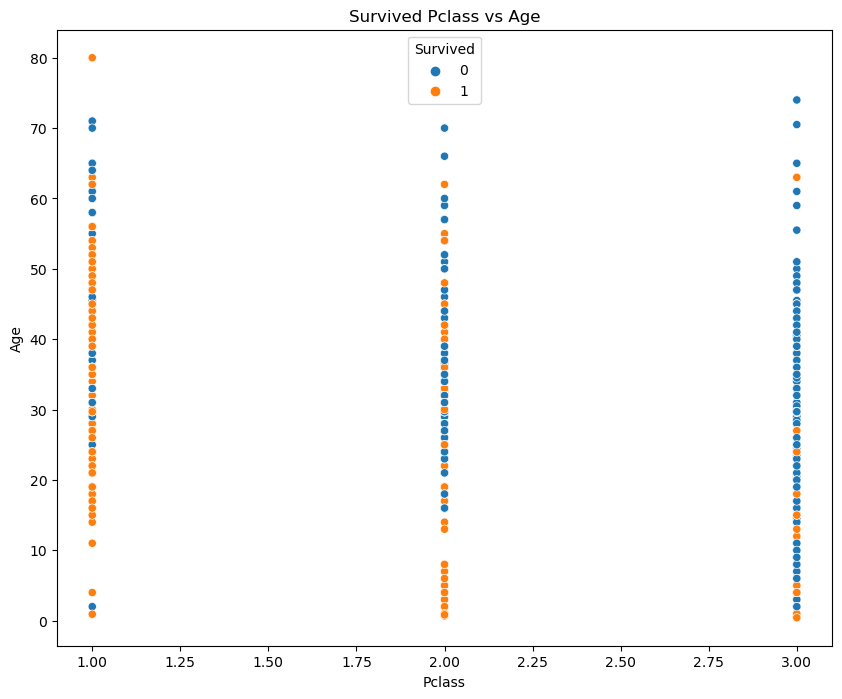

In [281]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df_trn)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Survived Pclass vs Age')
plt.show()

<AxesSubplot:>

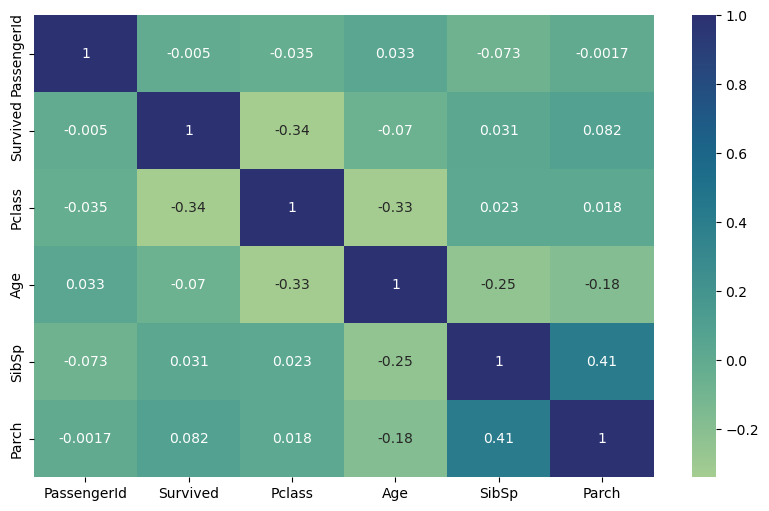

In [282]:
corr = df_trn.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True, cmap='crest')

<AxesSubplot:ylabel='Pclass'>

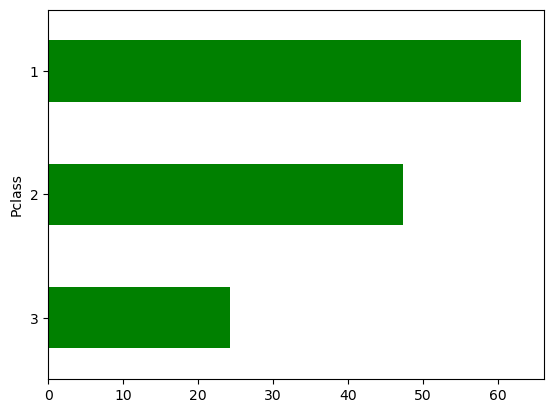

In [283]:
(df_trn.groupby("Pclass")["Survived"].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='SibSp'>

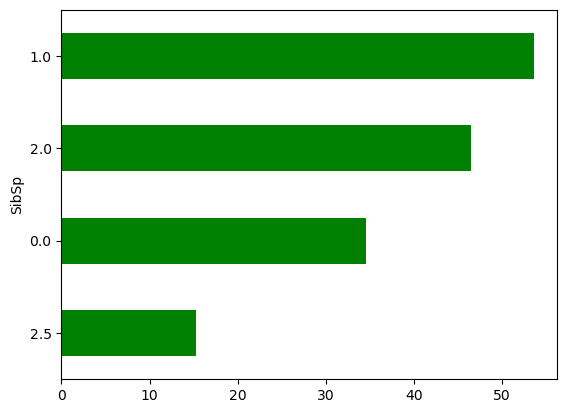

In [284]:
(df_trn.groupby("SibSp")["Survived"].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='Parch'>

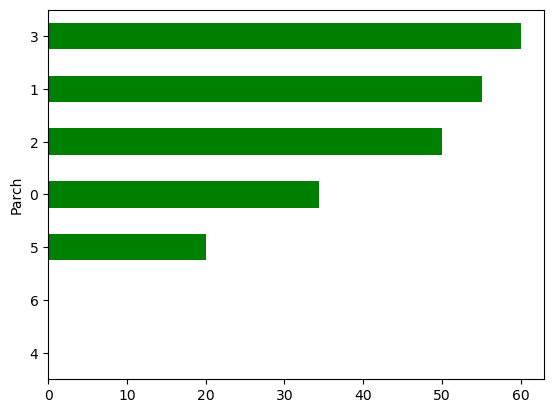

In [285]:
(df_trn.groupby("Parch")["Survived"].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='Sex'>

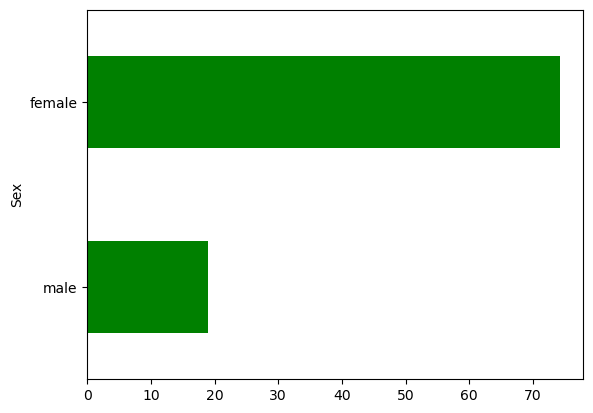

In [286]:
(df_trn.groupby("Sex")["Survived"].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='Embarked'>

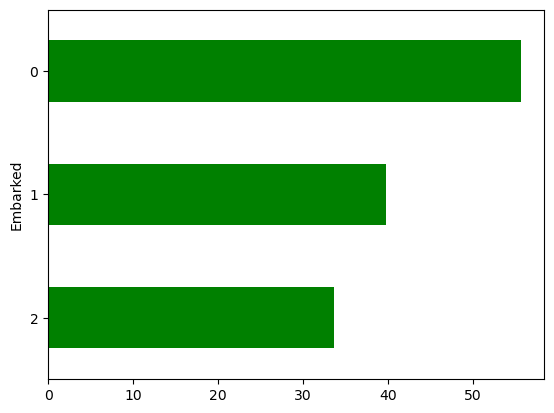

In [291]:
(df_trn.groupby("Embarked")["Survived"].mean()*100).sort_values().plot(kind="barh", color="green")

In [292]:
dff = pd.read_csv('gender_submission.csv')
dff.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [293]:
df_tst = pd.merge(df_tst, dff, on = ['PassengerId'], how = 'inner')

In [294]:
df_tst

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,1,34.50000,0.0,0,1,0
1,893,3,0,47.00000,1.0,0,2,1
2,894,2,1,62.00000,0.0,0,1,0
3,895,3,1,27.00000,0.0,0,2,0
4,896,3,0,22.00000,1.0,1,2,1
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0.0,0,2,0
414,1306,1,0,39.00000,0.0,0,0,1
415,1307,3,1,38.50000,0.0,0,2,0
416,1308,3,1,30.27259,0.0,0,2,0


# Encoding

In [295]:
df_trn['Sex'] = df_trn['Sex'].replace({'female' : 0, 'male' : 1})
df_tst['Sex'] = df_tst['Sex'].replace({'female' : 0, 'male' : 1})

df_trn['Embarked'] = df_trn['Embarked'].replace({'C' : 0, 'Q' : 1, 'S' : 2})
df_tst['Embarked'] = df_tst['Embarked'].replace({'C' : 0, 'Q' : 1, 'S' : 2})

# Train Test split

In [320]:
X_train = df_trn[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex', 'Embarked']]
y_train = df_trn['Survived']
X_test = df_tst[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex', 'Embarked']]
y_test = df_tst['Survived']

# Logistic Regression

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
log = LogisticRegression()
log.fit(X_train, y_train)
y_predict_log = log.predict(X_test)
roc_auc_score(y_test,y_predict_log)

0.9375000000000001

In [322]:
log.coef_

array([[-1.12026077, -0.03764315, -0.28516288, -0.1076728 , -2.62322885,
        -0.25571747]])

# Decision Tree

In [298]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in range(1,15) :
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    y_predict_dt = dt.predict(X_test)
    auroc = roc_auc_score(y_test, y_predict_dt)
    print('Depth : ', depth, 'Train Score : ', dt.score(X_train, y_train), 'AUROC : ', auroc, 'Cross Validation : ', np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring = 'roc_auc')))


Depth :  1 Train Score :  0.7867564534231201 AUROC :  1.0 Cross Validation :  0.7668003565062389
Depth :  2 Train Score :  0.7957351290684624 AUROC :  0.7481203007518796 Cross Validation :  0.8021547972724443
Depth :  3 Train Score :  0.8282828282828283 AUROC :  0.8472744360902256 Cross Validation :  0.8451156381744618
Depth :  4 Train Score :  0.8338945005611672 AUROC :  0.7880639097744362 Cross Validation :  0.8445888294711823
Depth :  5 Train Score :  0.8507295173961841 AUROC :  0.8472744360902256 Cross Validation :  0.8434105763517528
Depth :  6 Train Score :  0.8518518518518519 AUROC :  0.806860902255639 Cross Validation :  0.8394700223523752
Depth :  7 Train Score :  0.867564534231201 AUROC :  0.8237781954887218 Cross Validation :  0.8238274057097585
Depth :  8 Train Score :  0.8765432098765432 AUROC :  0.7767857142857142 Cross Validation :  0.8036809269162211
Depth :  9 Train Score :  0.8945005611672279 AUROC :  0.8162593984962404 Cross Validation :  0.7946960076960077
Depth :  

In [312]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
roc_auc_score(y_test, y_predict_dt)

0.8472744360902256

# Random Forest

In [313]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, max_depth = 2, max_features = 'sqrt')
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
roc_auc_score(y_test, y_predict_rf)

0.8040413533834586

# XGBoost

In [302]:
import xgboost as xgb

for lr in [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05]:
    xg = xgb.XGBClassifier(learning_rate = lr, n_estimator = 100, verbosity = 0)
    xg.fit(X_train, y_train)
    y_predict_xg = xg.predict(X_test)
    auroc = roc_auc_score(y_test, y_predict_xg)
    print('Learning Rate : ', lr, 'Train Score : ', xg.score(X_train, y_train), 'AUROC : ', auroc, 'Cross Validation : ', np.mean(cross_val_score(xg, X_train, y_train, cv=10, scoring = 'roc_auc')))


Learning Rate :  0.001 Train Score :  0.8507295173961841 AUROC :  0.8557330827067668 Cross Validation :  0.860283988342812
Learning Rate :  0.002 Train Score :  0.8507295173961841 AUROC :  0.8557330827067668 Cross Validation :  0.8600456384574032
Learning Rate :  0.003 Train Score :  0.8484848484848485 AUROC :  0.8557330827067668 Cross Validation :  0.8569406671759612
Learning Rate :  0.004 Train Score :  0.8484848484848485 AUROC :  0.8524436090225563 Cross Validation :  0.857275273745862
Learning Rate :  0.005 Train Score :  0.8484848484848485 AUROC :  0.8952067669172932 Cross Validation :  0.8583976459270575
Learning Rate :  0.006 Train Score :  0.8484848484848485 AUROC :  0.8952067669172932 Cross Validation :  0.8586554621848739
Learning Rate :  0.007 Train Score :  0.8484848484848485 AUROC :  0.8952067669172932 Cross Validation :  0.8609994058229352
Learning Rate :  0.008 Train Score :  0.8484848484848485 AUROC :  0.8952067669172932 Cross Validation :  0.8613475652887417
Learning R

In [303]:
import xgboost as xgb
xg = xgb.XGBClassifier(learning_rate = 0.01, n_estimator = 100, verbosity = 0)
xg.fit(X_train, y_train)
y_predict_xg = xg.predict(X_test)
roc_auc_score(y_test, y_predict_xg)

0.8862781954887218

In [328]:
result=pd.DataFrame({'PassengerId':df_tst.PassengerId,'Survived':y_predict_log})

In [329]:
result.to_csv('submission.csv',index=False)

# Voting Classifier

In [314]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

model1 =DecisionTreeClassifier(max_depth = 3)
model2 = RandomForestClassifier(n_estimators = 100, max_depth = 2, max_features = 'sqrt')
model3 = xgb.XGBClassifier(learning_rate = 0.01, n_estimator = 100, verbosity = 0)
model4 = LogisticRegression()
model5 = KNeighborsClassifier()
model = VotingClassifier(estimators=[('Decision Tree : ', model1), ('Random Forest : ', model2),('XGBoost : ',model3), ('Logistic Regression : ', model4), ('KNN : ', model5)]) 

model.fit(X_train, y_train)
y_predict_voting = model.predict(X_test)
roc_auc_score(y_test, y_predict_voting)

0.8876879699248119

# AUROC

In [315]:
AUROC = pd.Series({'XGBoost' : (roc_auc_score(y_test, y_predict_xg)),
                   'Voting Classifier' : (roc_auc_score(y_test, y_predict_voting)),
                   'Decision Tree' : (roc_auc_score(y_test, y_predict_dt)),
                   'Random Forest' : (roc_auc_score(y_test, y_predict_rf)),
                   'Logistic Regression' : (roc_auc_score(y_test,y_predict_log))})
AUROC

XGBoost                0.886278
Voting Classifier      0.887688
Decision Tree          0.847274
Random Forest          0.804041
Logistic Regression    0.937500
dtype: float64

# Important Features

In [323]:
log.coef_

array([[-1.12026077, -0.03764315, -0.28516288, -0.1076728 , -2.62322885,
        -0.25571747]])

In [327]:
coef = pd.DataFrame([{'Pclass' : -1.12026077, 
'Age' : -0.03764315, 
'SibSp' : -0.28516288, 
'Parch' : -0.1076728, 
'Sex' : -2.62322885, 
'Embarked' : -0.25571747}])
coef

,Pclass,Age,SibSp,Parch,Sex,Embarked
0,-1.120261,-0.037643,-0.285163,-0.107673,-2.623229,-0.255717
